# Signal Norm Analysis
## Paul Yollin


In [1]:
#   Documentation of Funfile and its contained functions and classes is
#   found in Funfile.
import Funfile as Fun

#   Setting parameters to be used
params = {
    'f_ext': 'Hz_10v_erm_raw.fif',
    'rec':{}
}

102 of 102 T1/T2 magnetometer types replaced with T3.
102 of 102 T1/T2 magnetometer types replaced with T3.
102 of 102 T1/T2 magnetometer types replaced with T3.
102 of 102 T1/T2 magnetometer types replaced with T3.


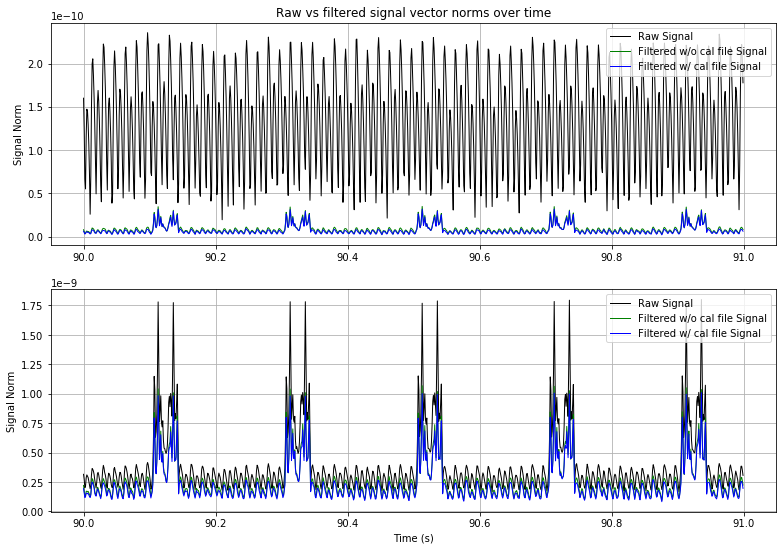

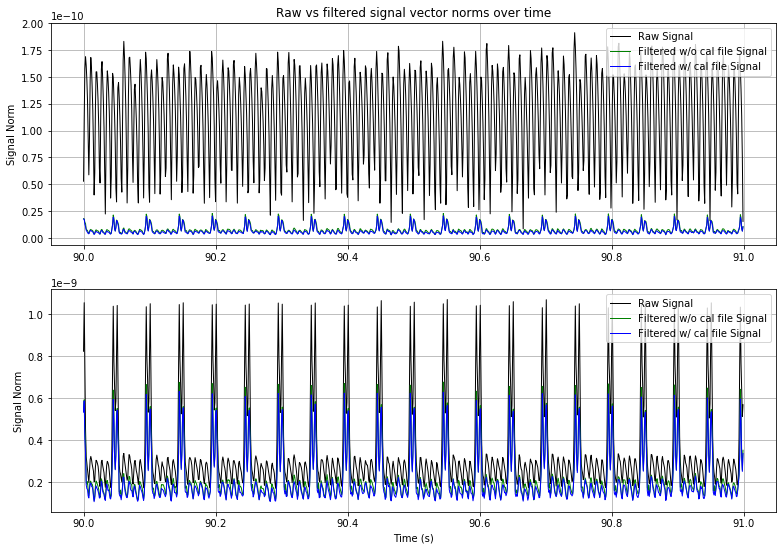

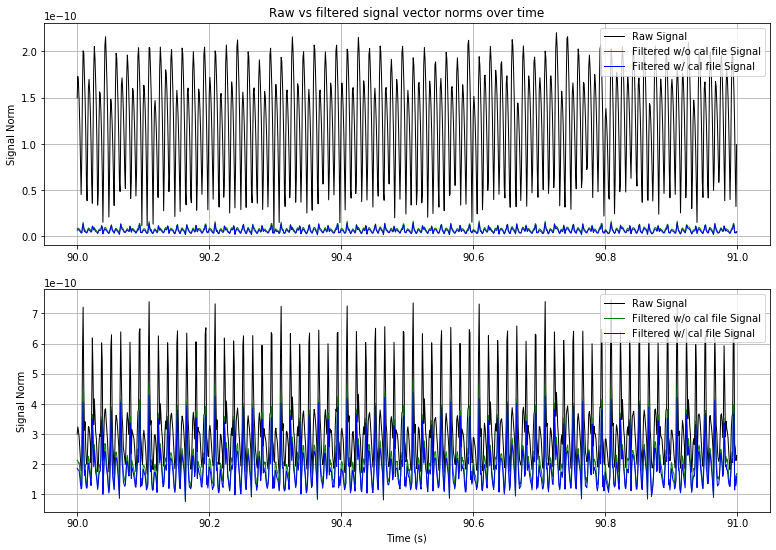

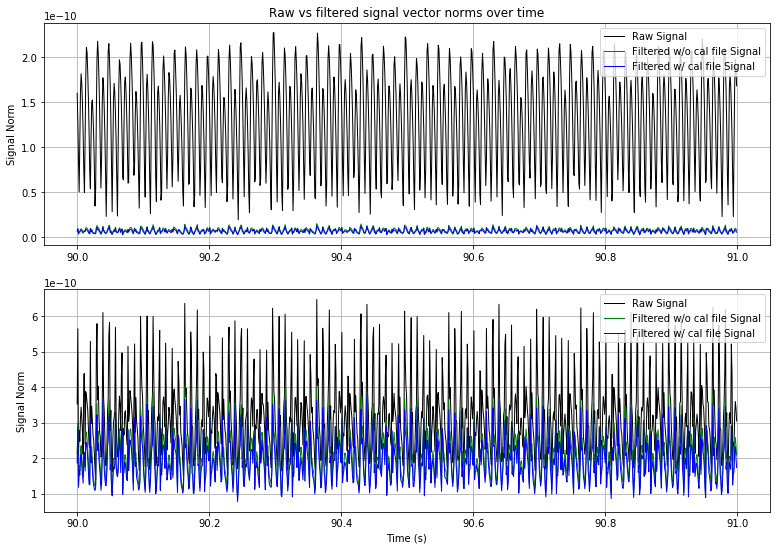

In [2]:
#   creating empty dictionary to hold data about calculated drops
drops = {}

#   For loop going through each freq, calculates drops and save it into
#   the empty drops{} dictionary, also plots signal norms
for i in ['5', '20', '70', '105']:
    
    #   setting the params recording number
    params['rec'] = i
    
    #   using setting dat to be a RecClass object, more info found in Funfile
    dat = Fun.RecClass(str(params['rec'])+str(params['f_ext']))
    
    #   plotting signal norms, only plotting 90 to 91 seconds of each
    #   recording, this was the clean part and easy to visually digest
    Fun.plot_norms(dat.data,90,91)
    
    #   saving drops of this recording into drops{} dictionary.
    #   drop is calculated as rms or raw over rms of filtered.
    drops[i] = Fun.find_drop(dat.data)
    
#   deleting i from the for loop, just trying to keep the code clean
del i

## Calculated drops

In [3]:
#   creates a header for printing the table of values from drop
print("{:<8} {:<15} {:<15} {:<15} {:<15}".format('Hz',
                                                 'mag drop',
                                                 'mag drop w/ cal',
                                                 'grad drop',
                                                 'grad drop w/ cal'))

#   for looping through all recording and printing calculated drops
#   currently rounded to 4th decimal place, change as desired
for i in ['5','20','70','105']:
    print("{:<8} {:<15} {:<15} {:<15} {:<15}".format(i,
                                                     round(drops[i]['mdat'], 4),
                                                     round(drops[i]['mcdat'], 4),
                                                     round(drops[i]['gdat'], 4),
                                                     round(drops[i]['gcdat'], 4)))
#   deleting i from the for loop
del i

Hz       mag drop        mag drop w/ cal grad drop       grad drop w/ cal
5        15.2294         16.9463         1.6027          1.7007         
20       15.6095         17.6181         1.6026          1.7144         
70       17.8122         20.4649         1.58            1.7067         
105      18.8416         22.0277         1.5139          1.6505         
